In [68]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Suppressing warnings
warnings.filterwarnings("ignore")

# Modeling and evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import plotly.graph_objects as go


In [4]:
# Load dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


---

## Data Science Project Lifecycle:

1. **Business Understanding:**  
   This initial stage revolves around defining the business goal and understanding the problem to be solved.

2. **Data Collection and Understanding:**  
   In this stage, all relevant data sources are identified, and the data is explored to understand its structure and relevance.

3. **Data Preparation:**  
   Data preparation involves cleaning, integrating, treating missing values, handling outliers, and formatting data for analysis.

4. **Exploratory Data Analysis:**  
   This step includes gaining insights into the data through visualization and understanding the factors that may affect the model.

5. **Feature Engineering:**  
   Feature engineering involves selecting, deriving new features, and preparing the data for modeling.

6. **Modeling:**  
   The modeling phase is where predictive models are built using machine learning algorithms to solve the business problem.

7. **Model Evaluation:**  
   After building models, they are rigorously evaluated to select the best-performing model for deployment.

8. **Model Deployment:**  
   The final step is deploying the selected model in a production environment to make predictions or recommendations.

Each stage in the data science lifecycle is critical, and proper execution of these steps ensures the success of a data science project.

## Business Understanding

The main objective of using the dataset for the project "The Hourly Energy Equation: Balancing Supply and Demand in Real-Time" is to develop a model that can accurately forecast hourly energy consumption and generation in Spain, balancing supply and demand in real-time. This forecasting model will be used to optimize the energy infrastructure and ensure a reliable and efficient energy supply.

---

### Dataset Overview

This project revolves around a comprehensive dataset spanning four years, capturing crucial insights into Spain's electrical ecosystem. The data amalgamates hourly records of electrical consumption and generation, settlement prices, and pertinent weather information for the five largest cities in Spain. Sourced from ENTSOE (Transmission Service Operator data) and REE (Red Electric España - Spanish TSO), this dataset not only provides a rich repository of historical information but also includes forecasts by the Transmission Service Operator (TSO) for both consumption and pricing.

The dataset is unique because it contains hourly data for electrical consumption and the respective forecasts by the TSO for consumption and pricing. This allows for a more accurate and detailed analysis of energy demand and supply patterns, which is essential for developing a model that can balance supply and demand in real-time.

The dataset is publicly available via ENTSOE and REE and may be found in the links provided. The inspiration behind using this dataset is the potential for deep learning and machine learning techniques to improve energy forecasting and contribute to the transition to a renewable-based electrical infrastructure.

---

### Problem Statement

1. The energy sector is undergoing a radical transformation, with the transition to renewable energy sources and the need to balance supply and demand in real-time becoming increasingly important.

2. The main challenges facing the power grid are the integration of bidirectional energy flows, the management of non-dispatchable generation, and the deployment of a digital telecommunications infrastructure that allows control and automation.

In the context of this project, the problem statement can be defined as:

**Problem Statement:**  
How can we develop a model that accurately forecasts hourly energy consumption and generation in Spain, balancing supply and demand in real-time, using the provided dataset of electrical consumption, generation, pricing, and weather data for Spain?

The objective is to create a model that can handle the changing demand for electricity and the use of different energy sources in today's fast-changing world, ensuring a reliable and efficient energy supply. This model will be used to optimize the energy infrastructure and maintain a high level of reliability in the power grid.

---

## References

- [ENTSOE (European Network of Transmission System Operators for Electricity)](https://transparency.entsoe.eu/dashboard/show)
- [REE (Red Eléctrica de España)](https://www.esios.ree.es/en/market-and-prices?date=11-03-2024)

## Data Collection and Understanding

In [6]:
# Weather data
weather_df = pd.read_csv("/content/drive/MyDrive/DataSets/Electricity Demand Forecast/weather_data.csv")

# Electricity demand data
electricity_df = pd.read_csv("/content/drive/MyDrive/DataSets/Electricity Demand Forecast/electricity_data.csv")

# Displaying the first few rows of the electricity demand data
electricity_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [7]:
electricity_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

The dataset contains the following columns:

1. **DateTime**:  
   Represents the timestamp for each record, indicating the date and time of observation.

2. **Wind Offshore (MW)**:  
   Indicates the offshore wind electricity generation in megawatts (MW), offering an estimate of offshore wind electricity generation for the next day.

3. **Wind Onshore (MW)**:  
   Represents the onshore wind electricity generation in megawatts (MW), offering an estimate of onshore wind electricity generation for the next day.

4. **Total Load Forecast (MW)**:  
   Reflects the forecasted electrical demand, providing an estimate of the total electricity demand for a specific period.

5. **Total Load Actual (MW)**:  
   Quantifies the actual electrical demand, indicating the real-time total electricity demand for a specific period.

6. **Price Day Ahead (EUR/MWh)**:  
   Represents the forecasted electricity price in euros per megawatt-hour (EUR/MWh) for a specific period.

7. **Price Actual (EUR/MWh)**:  
   Indicates the actual electricity price in euros per megawatt-hour (EUR/MWh) for a specific period.

These columns collectively provide a comprehensive snapshot of Spain's electrical generation, consumption, pricing, and renewable energy forecast data, allowing for in-depth analysis and forecasting.

In [9]:
# Displaying the first few rows of the weather demand data
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [10]:
weather_df.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

### Data Understanding - Short Explanation of Columns:

1. **DateTime and Location:**
   - **dt_iso**: Datetime index localized to Central European Time (CET).
   - **city_name**: Name of the city.

2. **Temperature and Pressure:**
   - **temp**: Temperature in Kelvin.
   - **temp_min**: Minimum temperature in Kelvin.
   - **temp_max**: Maximum temperature in Kelvin.
   - **pressure**: Atmospheric pressure in hectopascals (hPa).

3. **Humidity and Wind:**
   - **humidity**: Humidity in percentage.
   - **wind_speed**: Wind speed in meters per second (m/s).
   - **wind_deg**: Wind direction.

4. **Precipitation and Snow:**
   - **rain_1h**: Rain in the last hour in millimeters (mm).
   - **rain_3h**: Rain in the last 3 hours in millimeters (mm).
   - **snow_3h**: Snow in the last 3 hours in millimeters (mm).

5. **Cloud Cover and Weather Description:**
   - **clouds_all**: Cloud cover in percentage.
   - **weather_id**: Code used to describe weather.
   - **weather_main**: Short description of current weather.
   - **weather_description**: Long description of current weather.
   - **weather_icon**: Weather icon code for the website.

These columns collectively provide comprehensive weather-related information, including temperature, pressure, humidity, wind speed, precipitation, cloud cover, and weather descriptions, facilitating detailed analysis and forecasting.

Data Exploration and Preparation

In [11]:
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [12]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [13]:
# Converting datetime columns to datetime objects with UTC timezone
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], errors='coerce', utc=True)
electricity_df['time'] = pd.to_datetime(electricity_df['time'], errors='coerce', utc=True)

# Merging the two dataframes on the common columns 'time' and 'dt_iso'
merged_df = pd.merge(electricity_df, weather_df, left_on='time', right_on='dt_iso', how='inner')

# If the common column is no longer needed, you can drop it
merged_df = merged_df.drop(['dt_iso'], axis=1)

# Displaying the first few rows of the merged dataframe
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [15]:
merged_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [16]:
# Counting duplicate entries based on the 'time' column
duplicate_count = merged_df.duplicated(subset=['time']).sum()

# Printing the count of duplicates
print("Number of duplicates based on the time column:", duplicate_count)

Number of duplicates based on the time column: 143332


In [17]:
# Displaying information about the merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype              
---  ------                                       --------------   -----              
 0   time                                         178396 non-null  datetime64[ns, UTC]
 1   generation biomass                           178301 non-null  float64            
 2   generation fossil brown coal/lignite         178306 non-null  float64            
 3   generation fossil coal-derived gas           178306 non-null  float64            
 4   generation fossil gas                        178306 non-null  float64            
 5   generation fossil hard coal                  178306 non-null  float64            
 6   generation fossil oil                        178301 non-null  float64            
 7   generation fossil oil shale                  178306 non-null  float64            
 8   generation fos

In [18]:
# Dropping duplicate entries based on the 'time' column
merged_df = merged_df.drop_duplicates(subset=['time'])

# Displaying the first few rows of the updated dataframe
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
10,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
15,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
20,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 178391
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat        

In [20]:
merged_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023,290.783954,290.225644,291.357900,1015.979381,65.093971,2.692477,160.801648,0.034458,0.000227,0.000154,20.740475,782.171800
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083,7.234569,7.090499,7.523438,11.937650,19.678281,2.582959,120.412607,0.263594,0.003535,0.011912,25.604016,76.809176
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000,268.830656,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500,285.150000,285.150000,285.650000,1012.000000,51.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000,290.190000,290.150000,291.150000,1017.000000,67.000000,2.000000,130.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000,296.150000,295.370000,297.150000,1021.000000,82.000000,4.000000,280.000000,0.000000,0.000000,0.000000,20.000000,801.000000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000,311.150000,311.150000,314.820000,1087.000000,100.000000,133.000000,360.000000,12.000000,0.100000,1.125000,100.000000,804.000000


In [21]:
merged_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [25]:
# Correcting the typo in the selected columns list
selected_columns = [
    'time', 'generation biomass', 'generation fossil brown coal/lignite',
    'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil',
    'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage',
    'generation hydro water reservoir', 'generation nuclear', 'generation other',
    'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore',
    'total load actual', 'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
    'wind_speed', 'clouds_all', 'weather_main'
]

# Creating a new dataframe with specified columns
merged_new = merged_df.loc[:, selected_columns]

# Displaying the first few rows of the new dataframe
merged_new.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


In [26]:
# Renaming the column 'generation wind onshore' to 'generation wind'
merged_new.rename(columns={"generation wind onsh": "generation wind"}, inplace=True)

# Checking for missing values in the dataframe
missing_values = merged_new.isnull().sum()

# Printing the count of missing values for each column
print("Count of missing values in each column:")
print(missing_values)

Count of missing values in each column:
time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price actual                                    0
temp_min                                        0
temp_max                                        0
pressure  

In [28]:
# Remove rows with null values from the DataFrame
merged_new = merged_new.dropna()

# Check if there are any null values in the DataFrame
null_check = merged_new.isnull().values.any()

# Printing True if there are null values, False if there are no null values
print("Are there any null values in the DataFrame?", null_check)

# Converting the 'time' column to datetime objects with UTC timezone
merged_new['time'] = pd.to_datetime(merged_new['time'], errors='coerce', utc=True)

# Displaying information about the updated dataframe
merged_new.info()

Are there any null values in the DataFrame? False
<class 'pandas.core.frame.DataFrame'>
Index: 35018 entries, 0 to 178391
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35018 non-null  datetime64[ns, UTC]
 1   generation biomass                           35018 non-null  float64            
 2   generation fossil brown coal/lignite         35018 non-null  float64            
 3   generation fossil gas                        35018 non-null  float64            
 4   generation fossil hard coal                  35018 non-null  float64            
 5   generation fossil oil                        35018 non-null  float64            
 6   generation hydro pumped storage consumption  35018 non-null  float64            
 7   generation hydro run-of-river and poundage   35018 non-null  float

In [29]:
merged_new.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000
mean,383.528614,448.115940,5622.496373,4255.618625,298.333114,475.712833,972.081787,2604.490862,6264.021817,60.237107,85.651436,1433.054201,269.502142,5466.056742,28696.833457,57.887268,290.232235,291.364570,1015.986179,65.096665,2.692387,20.747159
std,85.303560,354.608322,2202.043540,1961.420351,52.469975,792.546192,400.751496,1834.938030,838.274351,20.236076,14.063817,1680.323255,50.143242,3213.580919,4574.173105,14.190082,7.089812,7.522657,11.939170,19.677740,2.583226,25.602385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000,24808.000000,49.360000,285.150000,285.659000,1012.000000,51.000000,1.000000,0.000000
50%,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000,28901.500000,58.020000,290.150000,291.150000,1017.000000,67.000000,2.000000,20.000000
75%,433.000000,757.000000,6428.750000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2578.750000,310.000000,7399.000000,32192.000000,68.000000,295.370000,297.150000,1021.000000,82.000000,4.000000,20.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000,311.150000,314.820000,1087.000000,100.000000,133.000000,100.000000


In [30]:
merged_new.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')

In [31]:
# Extracting date and hour components
merged_new['date'] = merged_new['time'].dt.date
merged_new['hour'] = merged_new['time'].dt.hour

# Extracting month, week, and day components
merged_new['month'] = merged_new['time'].dt.month
merged_new['week'] = merged_new['time'].dt.isocalendar().week  # ISO week number
merged_new['day'] = merged_new['time'].dt.day
merged_new['year'] = merged_new['time'].dt.year

# Dropping the 'time' column
merged_new = merged_new.drop(columns=['time'])

# Reordering the columns
column_order = ['date', 'year', 'month', 'week', 'day', 'hour'] + [col for col in merged_new.columns if col not in ['date', 'year', 'month', 'week', 'day', 'hour']]
merged_new = merged_new[column_order]

# Displaying the first few rows of the updated dataframe
merged_new.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


Exploratory Data Analysis

In [32]:
# Create a copy of the original DataFrame
df_eda = merged_new.copy()

# Perform your EDA on the copied DataFrame (df_copy)
# For example, you can check the first few rows of the copied DataFrame
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


In [33]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame with all columns visible
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


In [34]:
df_eda.describe()

,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,35018.000000,35018.000000,35018.0,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000
mean,2016.500942,6.525815,26.675081,15.736393,11.499714,383.528614,448.115940,5622.496373,4255.618625,298.333114,475.712833,972.081787,2604.490862,6264.021817,60.237107,85.651436,1433.054201,269.502142,5466.056742,28696.833457,57.887268,290.232235,291.364570,1015.986179,65.096665,2.692387,20.747159
std,1.117513,3.447927,15.060199,8.797409,6.923293,85.303560,354.608322,2202.043540,1961.420351,52.469975,792.546192,400.751496,1834.938030,838.274351,20.236076,14.063817,1680.323255,50.143242,3213.580919,4574.173105,14.190082,7.089812,7.522657,11.939170,19.677740,2.583226,25.602385
min,2014.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000
25%,2016.000000,4.000000,14.0,8.000000,5.000000,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000,24808.000000,49.360000,285.150000,285.659000,1012.000000,51.000000,1.000000,0.000000
50%,2017.000000,7.000000,27.0,16.000000,11.000000,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000,28901.500000,58.020000,290.150000,291.150000,1017.000000,67.000000,2.000000,20.000000
75%,2018.000000,10.000000,40.0,23.000000,17.750000,433.000000,757.000000,6428.750000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2578.750000,310.000000,7399.000000,32192.000000,68.000000,295.370000,297.150000,1021.000000,82.000000,4.000000,20.000000
max,2018.000000,12.000000,53.0,31.000000,23.000000,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000,311.150000,314.820000,1087.000000,100.000000,133.000000,100.000000


In [35]:
# Save the DataFrame to a CSV file without including the index
df_eda.to_csv('df_eda.csv', index=False)

# Print the column names of the DataFrame
print("Column names of the DataFrame:")
print(df_eda.columns)

Column names of the DataFrame:
Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')


In [36]:
# Assuming df_eda is your DataFrame
# Extracting unique weather categories from the 'weather_main' column
unique_weather_categories = df_eda['weather_main'].unique()

# Printing unique weather categories
print("Unique Weather Categories:")
print(unique_weather_categories)

Unique Weather Categories:
['clear' 'clouds' 'rain' 'mist' 'thunderstorm' 'drizzle' 'fog' 'smoke'
 'haze']


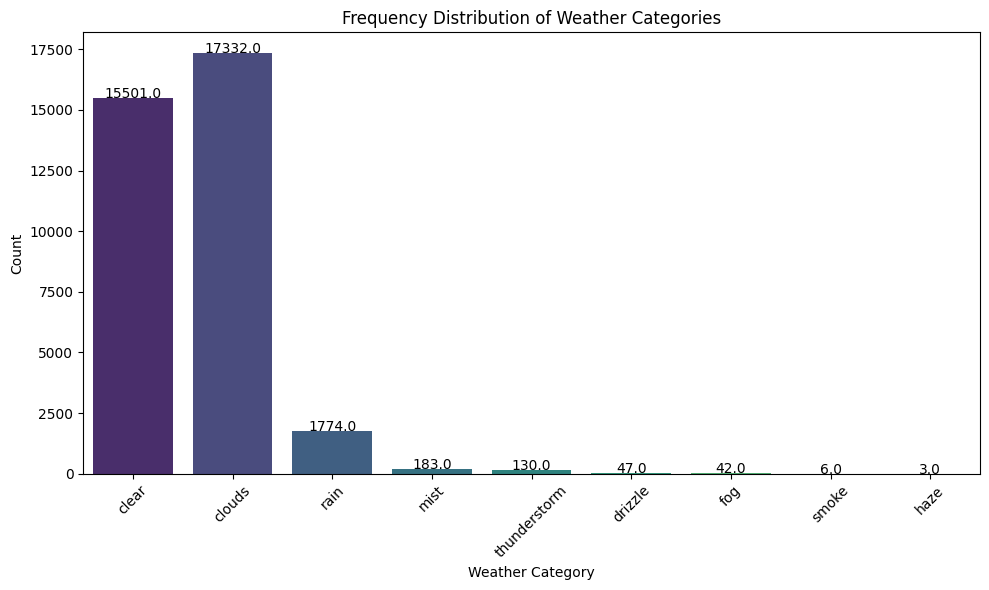

In [37]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a countplot for weather categories
ax = sns.countplot(x='weather_main', data=df_eda, palette='viridis')

# Set title and labels
plt.title('Frequency Distribution of Weather Categories')
plt.xlabel('Weather Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

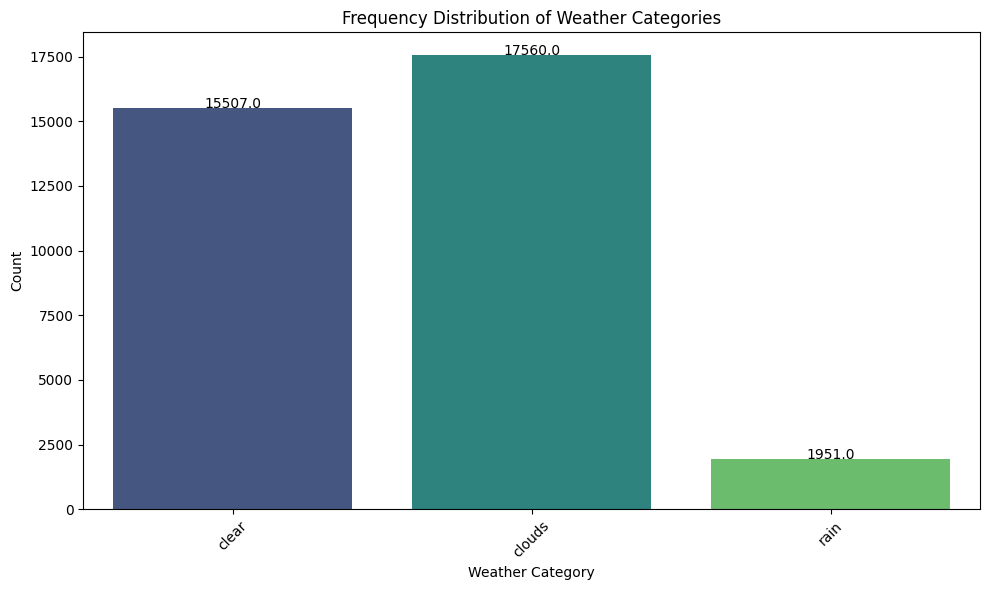

In [38]:
# Replace weather categories
df_eda['weather_main'] = df_eda['weather_main'].replace({
    'mist': 'clouds',
    'thunderstorm': 'rain',
    'drizzle': 'rain',
    'fog': 'clouds',
    'smoke': 'clear',
    'haze': 'clouds'
})

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='weather_main', data=df_eda, palette='viridis')

# Set title and labels
plt.title('Frequency Distribution of Weather Categories')
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

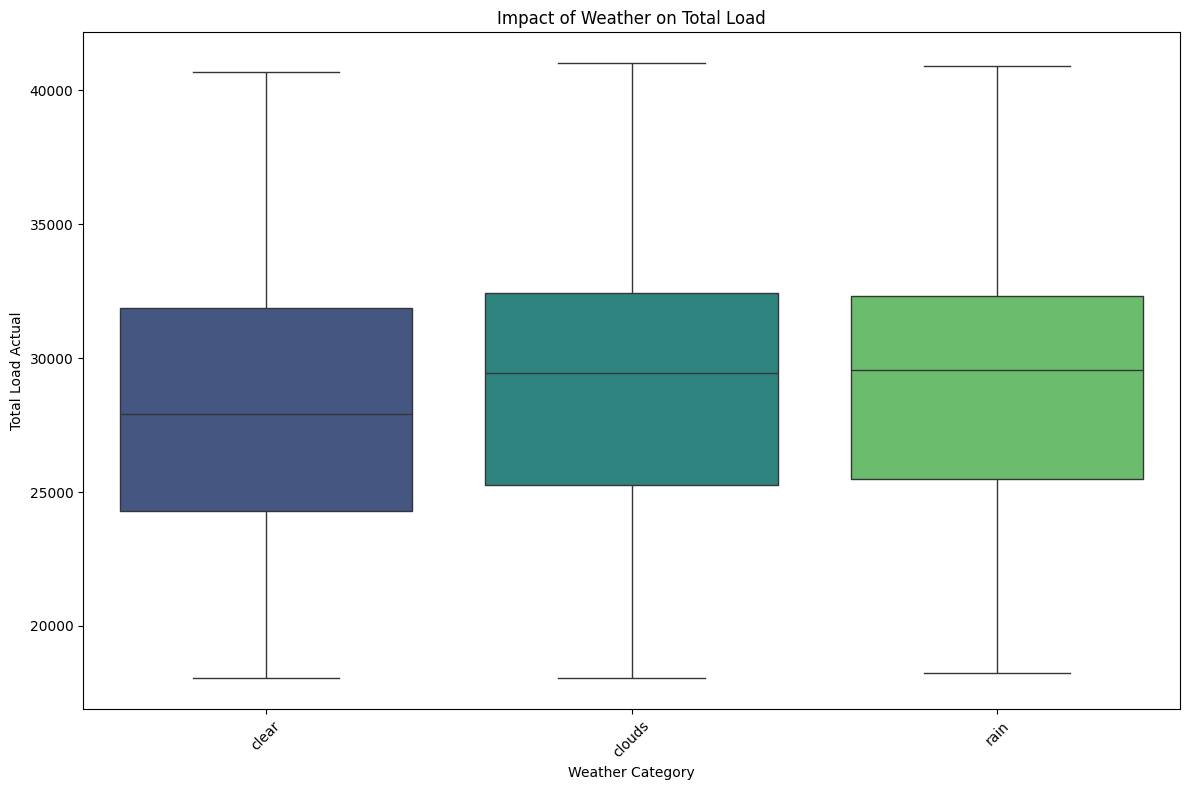

In [39]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a boxplot to visualize the impact of weather on total load
sns.boxplot(x='weather_main', y='total load actual', data=df_eda, palette='viridis')

# Set title and labels
plt.title('Impact of Weather on Total Load')
plt.xlabel('Weather Category')
plt.ylabel('Total Load Actual')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

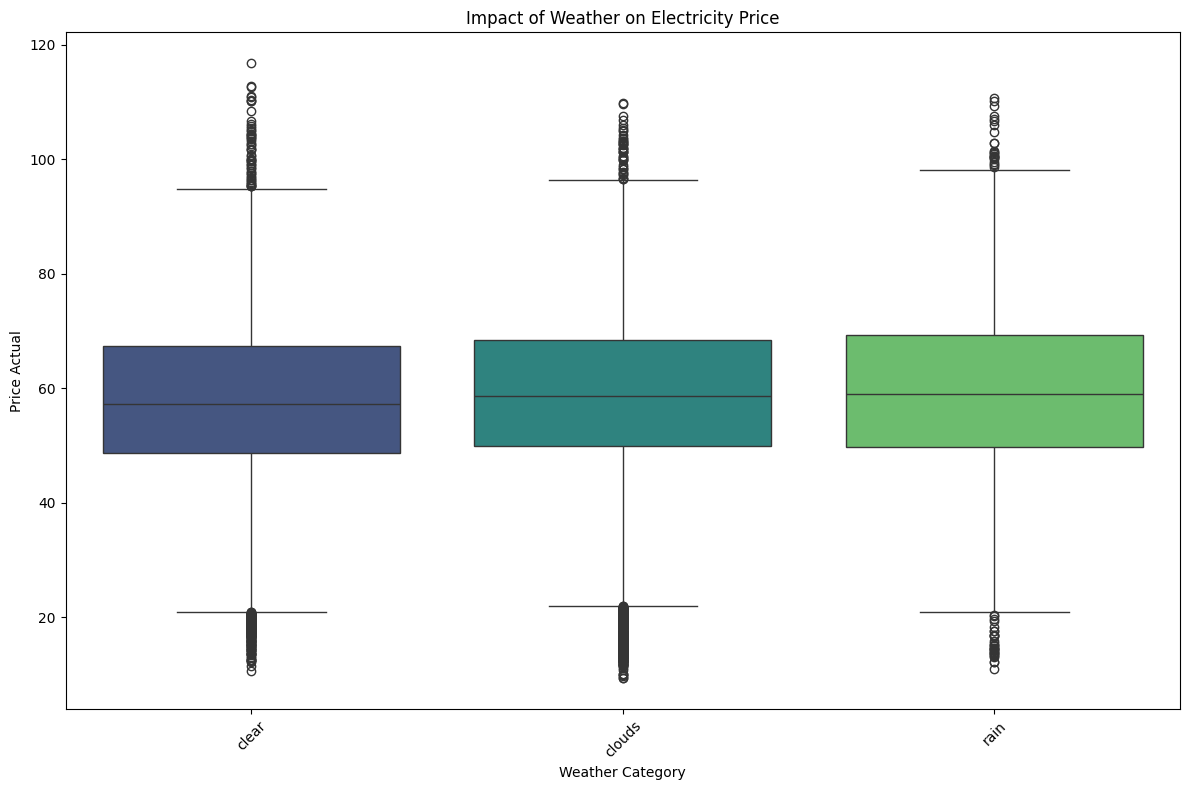

In [40]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a boxplot to visualize the impact of weather on electricity price
sns.boxplot(x='weather_main', y='price actual', data=df_eda, palette='viridis')

# Set title and labels
plt.title('Impact of Weather on Electricity Price')
plt.xlabel('Weather Category')
plt.ylabel('Price Actual')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

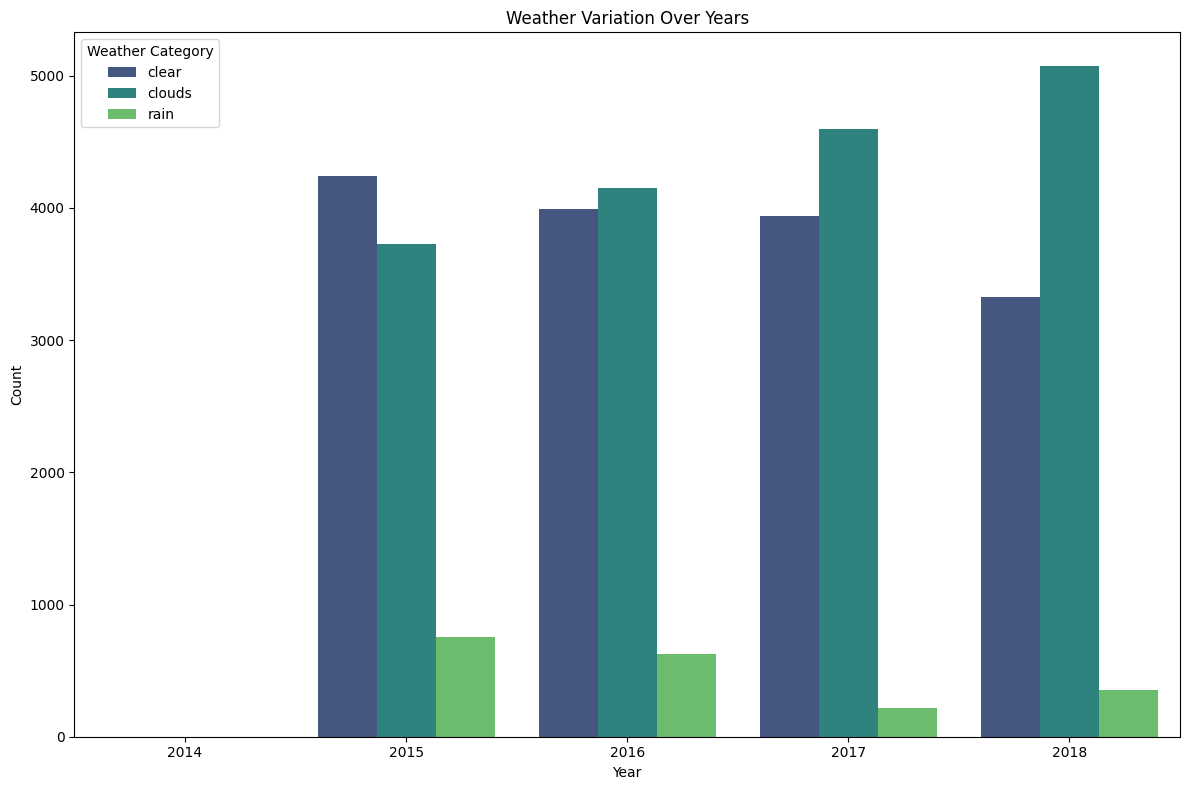

In [41]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a countplot to visualize weather variation over months
sns.countplot(x='year', hue='weather_main', data=df_eda, palette='viridis')

# Set title and labels
plt.title('Weather Variation Over Years')
plt.xlabel('Year')
plt.ylabel('Count')

# Add a legend with title for weather categories
plt.legend(title='Weather Category')

# Show the plot
plt.tight_layout()
plt.show()

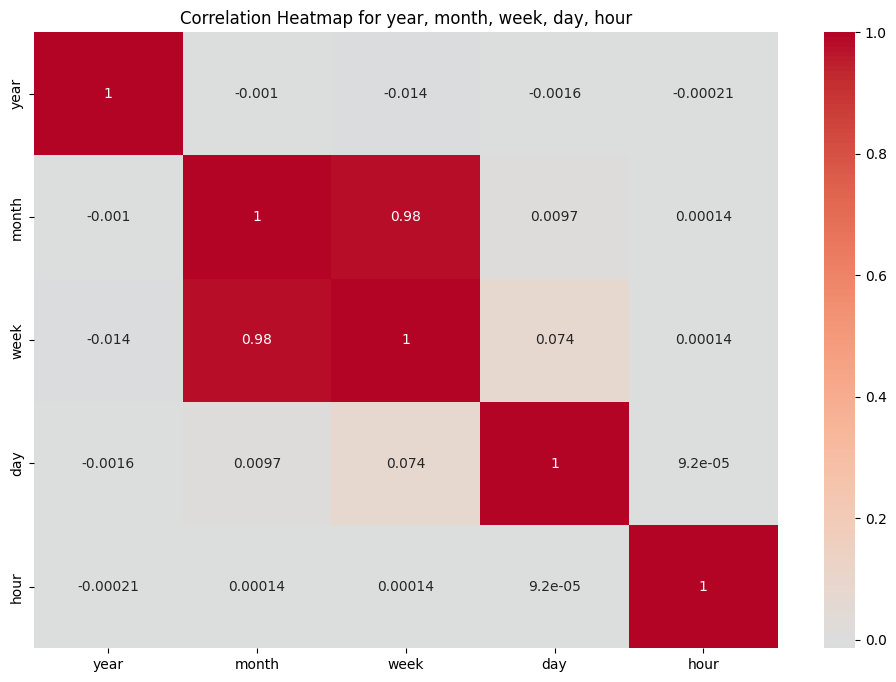

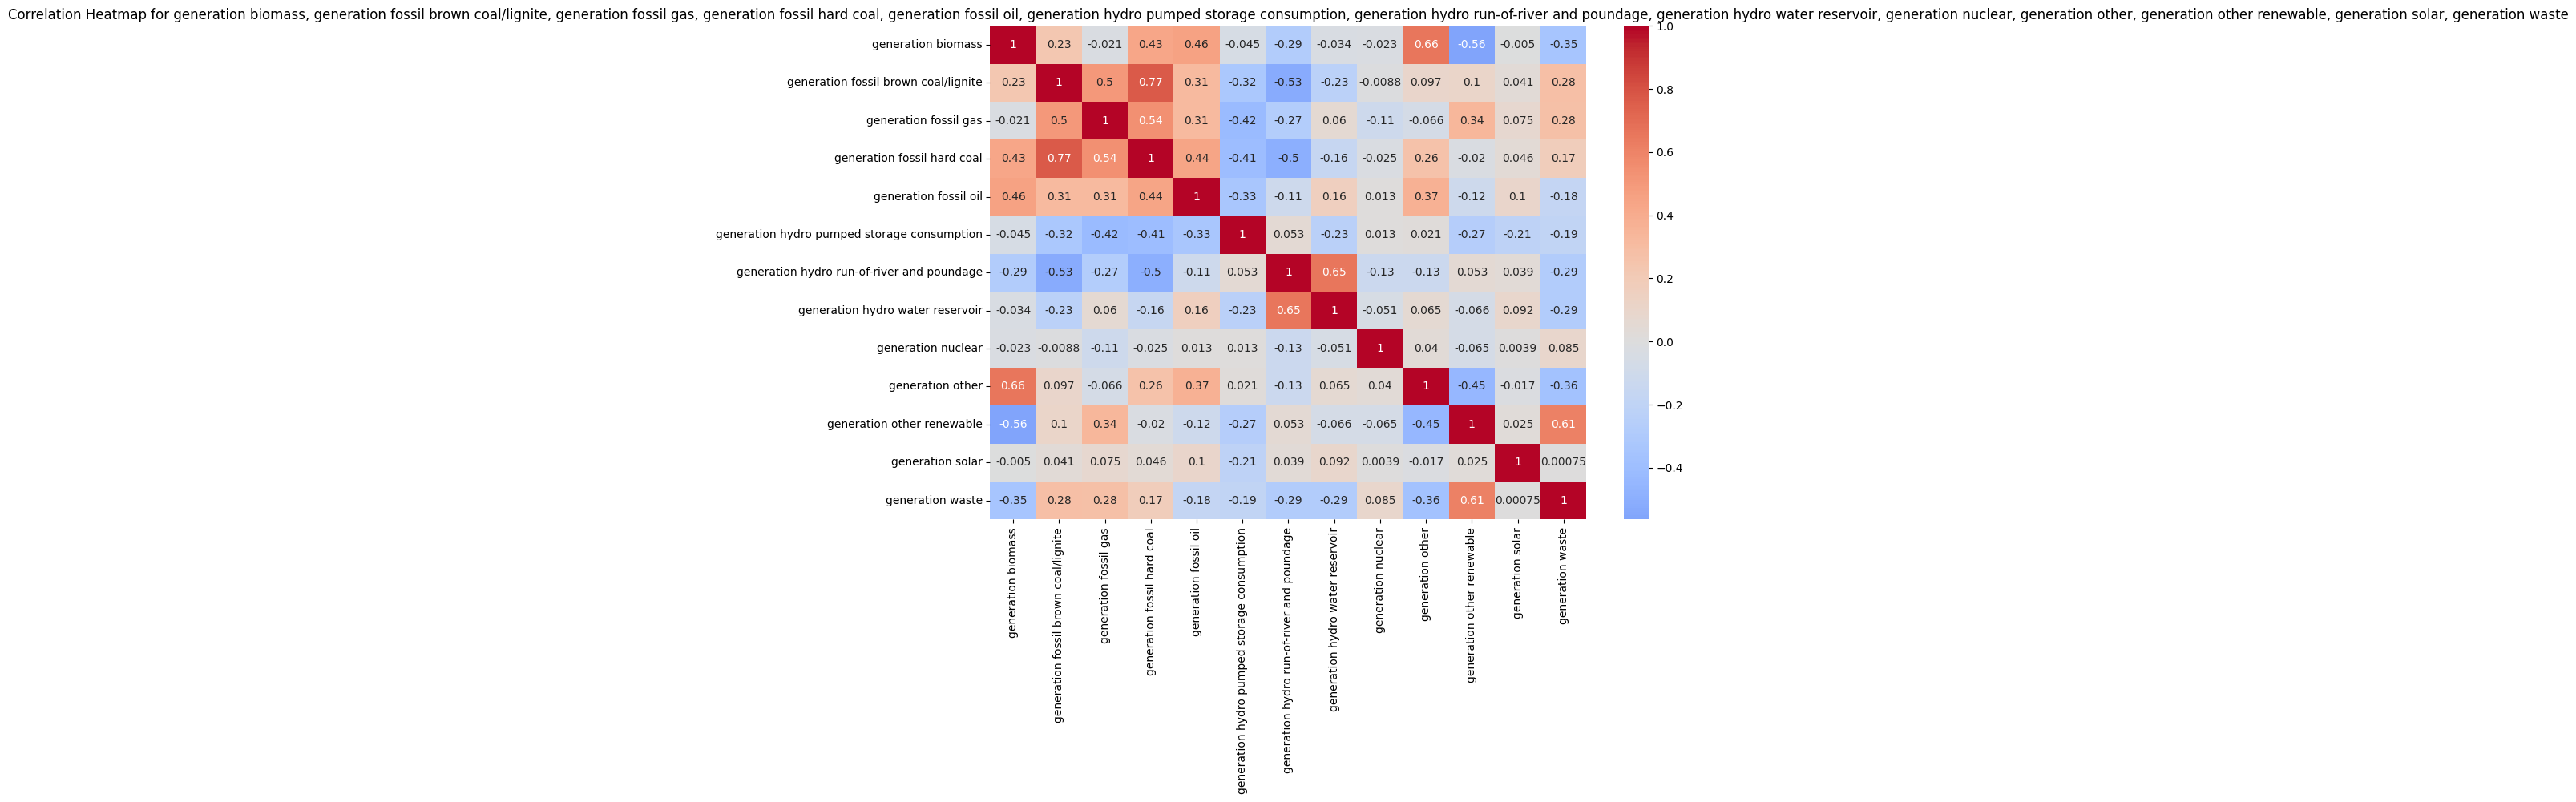

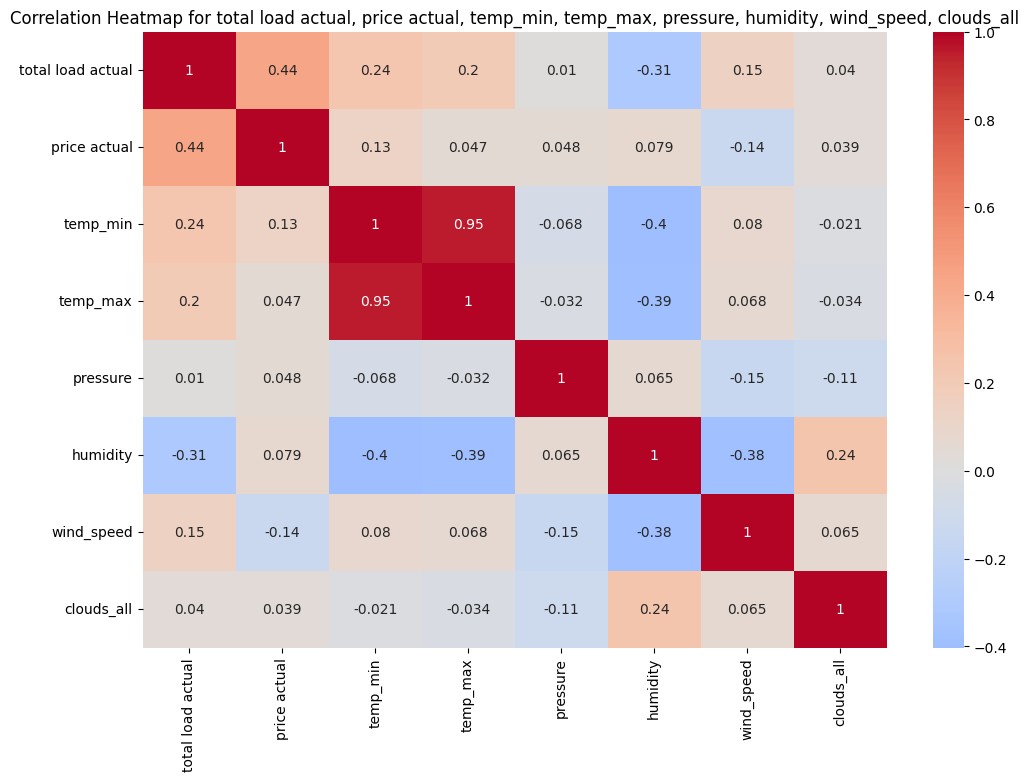

In [48]:
# List of groups based on variables
groups = [
    ['year', 'month', 'week', 'day', 'hour'],
    ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
     'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption',
     'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
     'generation other', 'generation other renewable', 'generation solar', 'generation waste'],
    ['total load actual', 'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'clouds_all']
]

# Plot heatmap for each group
for group in groups:
    plt.figure(figsize=(12, 8))
    try:
        sns.heatmap(df_eda[group].corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap for ' + ', '.join(group))
        plt.show()
    except KeyError as e:
        print(f"KeyError: {e} not found in DataFrame. Skipping this group.")

In [49]:
df_eda.columns

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')


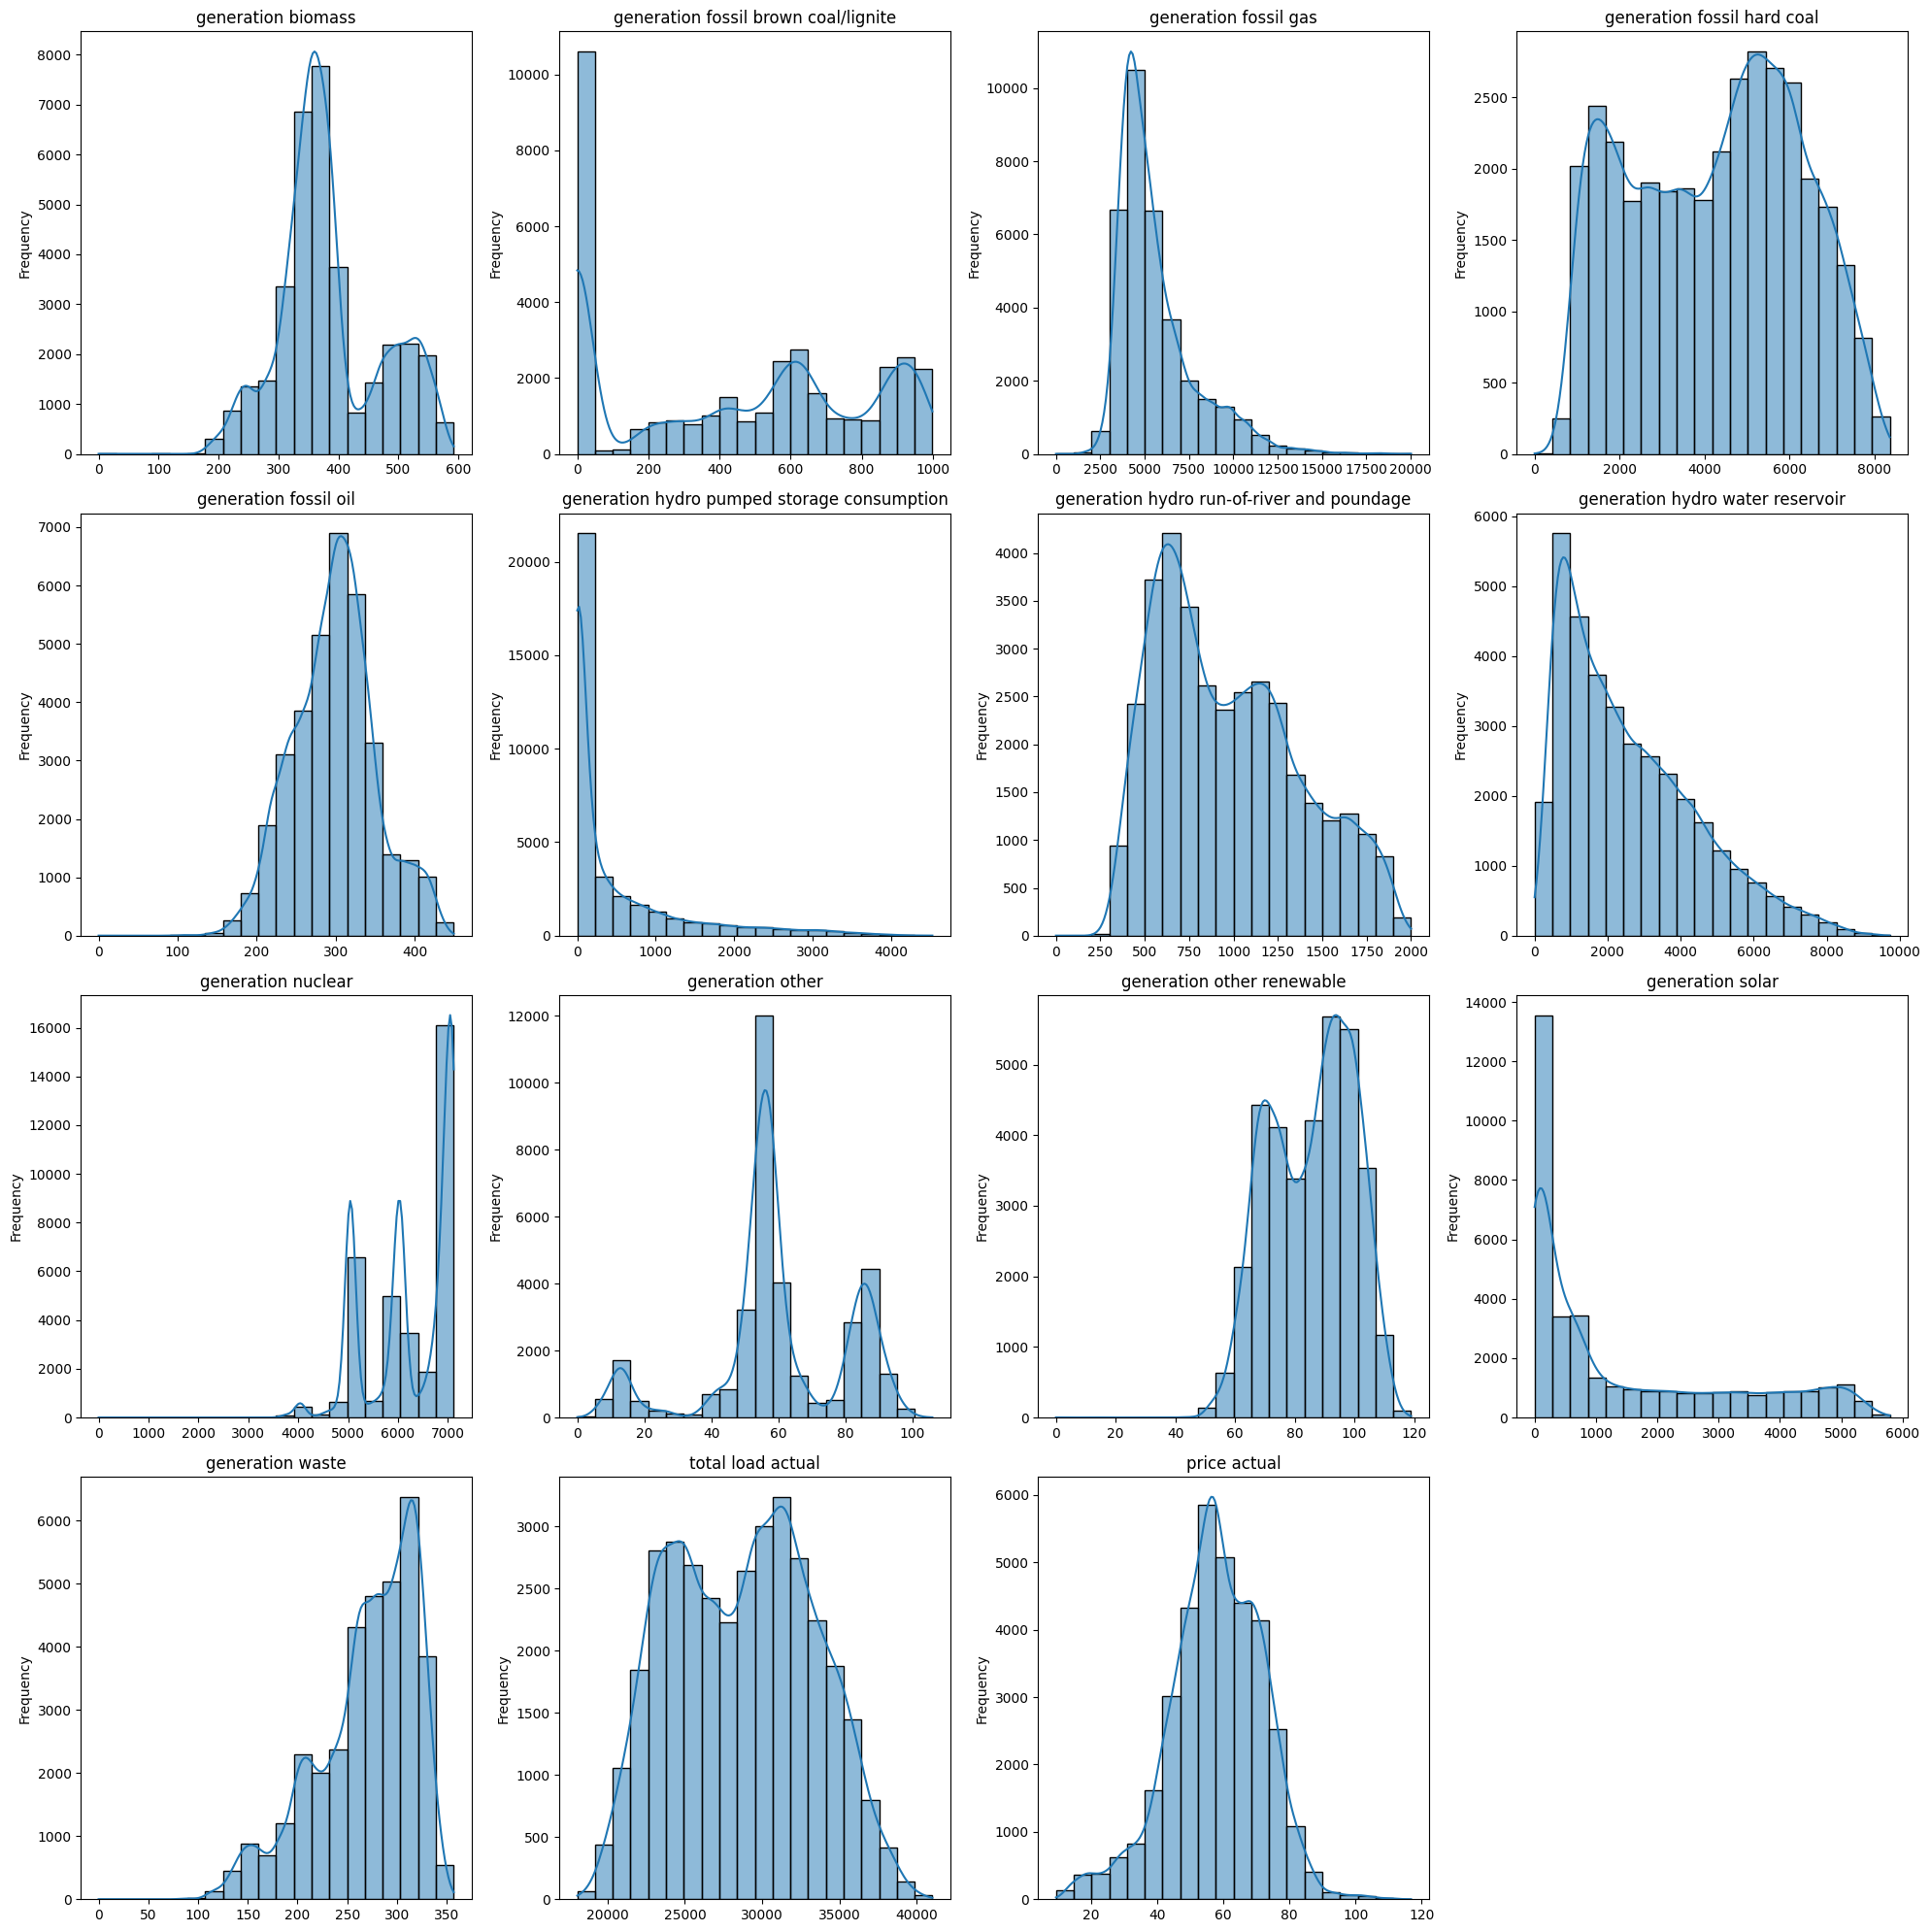

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the actual column names in the DataFrame
print(df_eda.columns)

# Adjust the selected_columns list based on the actual column names
selected_columns = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                    'generation fossil hard coal', 'generation fossil oil',
                    'generation hydro pumped storage consumption',
                    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                    'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                    'generation waste', 'total load actual', 'price actual']

# Set the number of columns and rows for the subplot
num_cols = 4
num_rows = (len(selected_columns) - 1) // num_cols + 1

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array to handle the case when there's only one row or column
axes = axes.flatten()

# Plot histograms for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(df_eda[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Hide any empty subplots if the number of selected columns is not a multiple of num_cols
for j in range(len(selected_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()


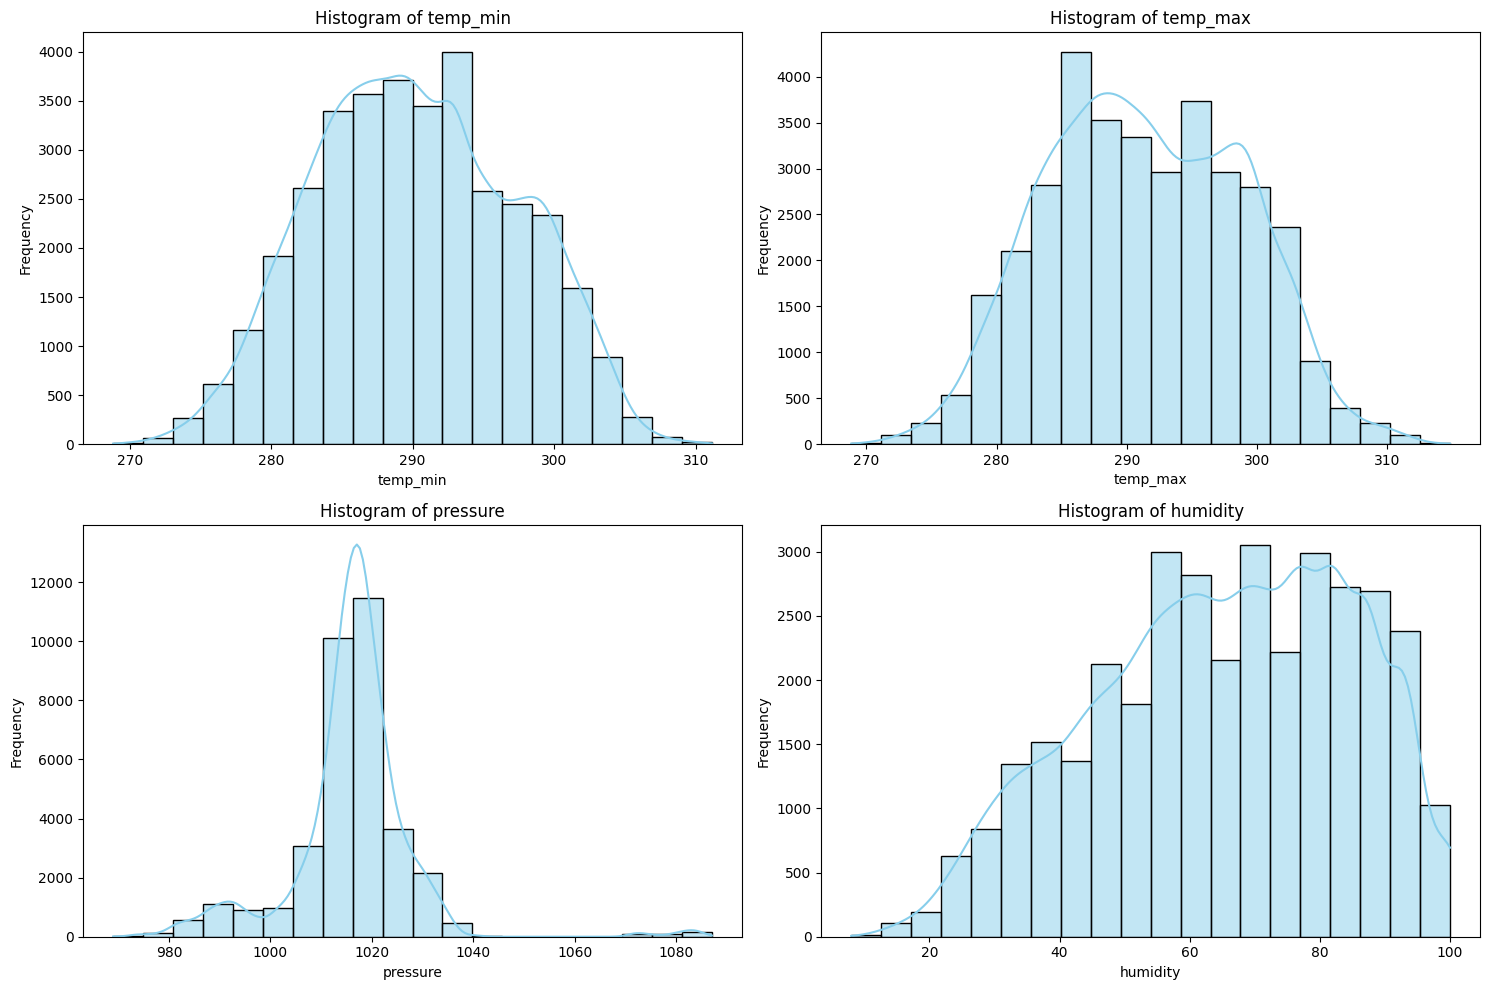

In [52]:
# Define the list of weather columns
weather_columns = ['temp_min', 'temp_max', 'pressure', 'humidity']

# Set up the matplotlib figure with a 2x2 subplot layout
plt.figure(figsize=(15, 10))

# Loop through each weather variable and create histograms
for i, column in enumerate(weather_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_eda[column], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [53]:
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


In [56]:
df_eda.to_csv('EDA_pb.csv', index=False)
df_eda.columns

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')

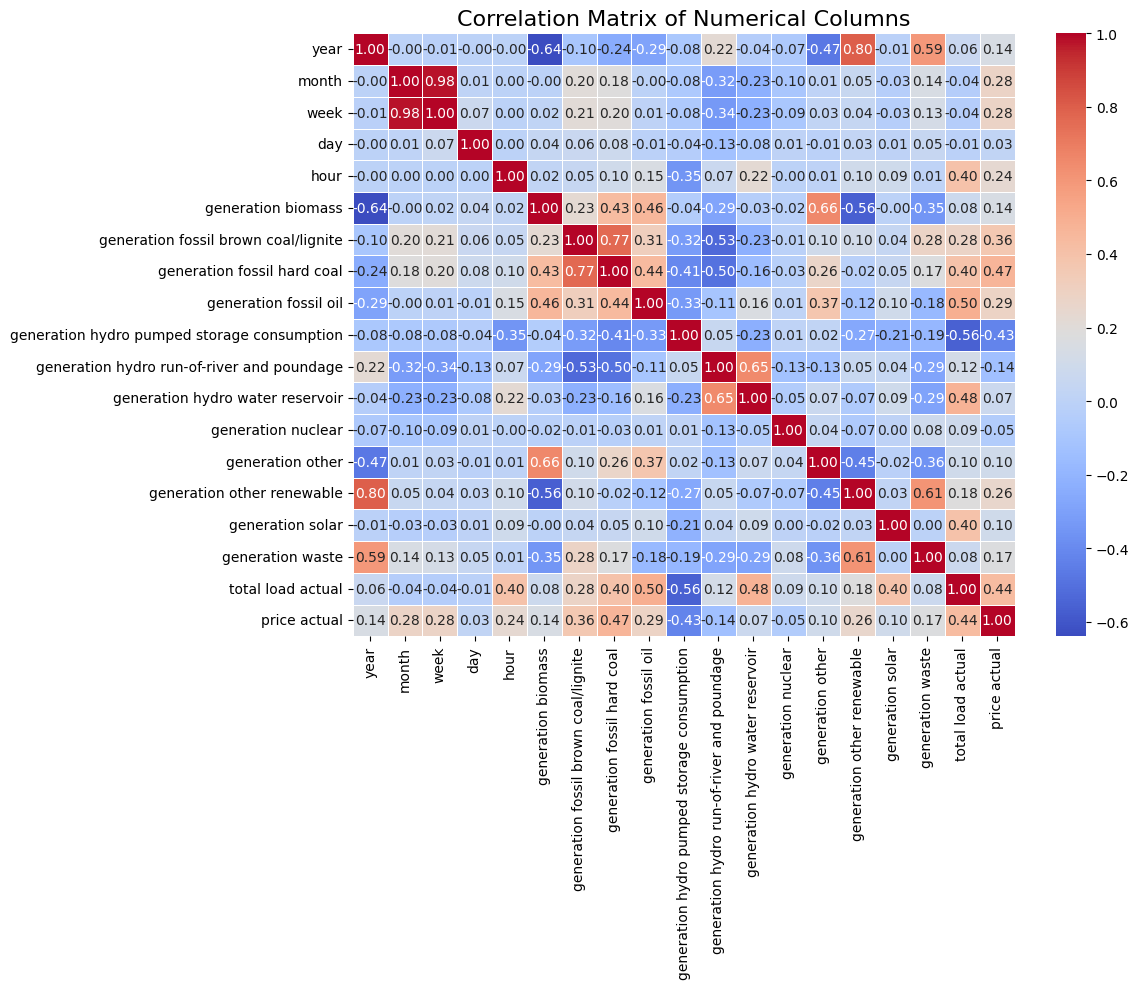

In [57]:
# Selecting all numerical columns
numerical_columns = ['year', 'month', 'week', 'day', 'hour', 'generation biomass',
                     'generation fossil brown coal/lignite', 'generation fossil hard coal',
                     'generation fossil oil', 'generation hydro pumped storage consumption',
                     'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                     'generation nuclear', 'generation other', 'generation other renewable',
                     'generation solar', 'generation waste', 'total load actual',
                     'price actual']

# Create a correlation matrix
correlation_matrix = df_eda[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title and adjust layout
plt.title('Correlation Matrix of Numerical Columns', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35018 entries, 0 to 178391
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   date                                         35018 non-null  object 
 1   year                                         35018 non-null  int32  
 2   month                                        35018 non-null  int32  
 3   week                                         35018 non-null  UInt32 
 4   day                                          35018 non-null  int32  
 5   hour                                         35018 non-null  int32  
 6   generation biomass                           35018 non-null  float64
 7   generation fossil brown coal/lignite         35018 non-null  float64
 8   generation fossil gas                        35018 non-null  float64
 9   generation fossil hard coal                  35018 non-null  float64
 10  ge

Feature Engineering


In [60]:
# List of generation columns
generation_columns = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                      'generation fossil hard coal', 'generation fossil oil',
                      'generation hydro pumped storage consumption',
                      'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                      'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                      'generation waste']

# Add a new column 'total load generated' by summing up all generation columns
df_eda['total load generated'] = df_eda[generation_columns].sum(axis=1)

# Display the DataFrame with the new column
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,total load generated
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear,21873.0
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear,21928.0
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear,21335.0
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear,19985.0
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear,19685.0


In [61]:
# Create a new column 'demand_supply_difference'
df_eda['demand_supply_difference'] = df_eda['total load generated'] - df_eda['total load actual']
df_eda[['date', 'hour', 'demand_supply_difference']].head()

,date,hour,demand_supply_difference
0,2014-12-31,23,-3512.0
5,2015-01-01,0,-2454.0
10,2015-01-01,1,-1399.0
15,2015-01-01,2,-1301.0
20,2015-01-01,3,-579.0


In [62]:
# Create a new column 'shifted_demand_supply' by shifting 'demand_supply_difference' column by one row
df_eda['shifted_demand_supply'] = df_eda['demand_supply_difference'].shift(-1)

# Select and display the relevant columns: 'date', 'hour', and 'shifted_demand_supply'
shifted_demand_supply_df = df_eda[['date', 'hour', 'shifted_demand_supply']].head()

# Display the DataFrame
shifted_demand_supply_df

,date,hour,shifted_demand_supply
0,2014-12-31,23,-2454.0
5,2015-01-01,0,-1399.0
10,2015-01-01,1,-1301.0
15,2015-01-01,2,-579.0
20,2015-01-01,3,-292.0


In [63]:
# Assuming you want to remove the last row since while building model it will cause issue and error
df_eda = df_eda.drop(df_eda.index[-1])
df_eda.columns

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main', 'total load generated',
       'demand_supply_difference', 'shifted_demand_supply'],
      dtype='object')

In [64]:
df_eda.shape

(35017, 32)

Model Building

In [67]:
# Assuming df_eda is your DataFrame
X = df_eda[['month', 'week', 'day', 'hour',
            'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
            'generation fossil hard coal', 'generation fossil oil',
            'generation hydro pumped storage consumption',
            'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
            'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
            'generation waste', 'temp_min', 'temp_max', 'pressure', 'humidity',
            'wind_speed', 'clouds_all', 'weather_main', 'total load actual', 'price actual']]
y = df_eda["shifted_demand_supply"]

# Define numerical and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Create transformers for numerical and categorical features
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ])

# Apply preprocessing pipeline to X
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
X_train.shape, X_test.shape

((28013, 28), (7004, 28))

In [70]:
def evaluate_model(true, predicted):
    """Function to evaluate model performance."""
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

# Define models to be evaluated
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Initialize an empty list to store results
results = []

# Loop through each model
for model_name, model in models.items():
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Append results to list
    results.append({
        'Model': model_name,
        'Train RMSE': model_train_rmse,
        'Train MAE': model_train_mae,
        'Train R2': model_train_r2,
        'Test RMSE': model_test_rmse,
        'Test MAE': model_test_mae,
        'Test R2': model_test_r2
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df.head(10)

,Model,Train RMSE,Train MAE,Train R2,Test RMSE,Test MAE,Test R2
0,Linear Regression,946.966165,667.940648,0.900826,938.028764,670.212647,0.900597
1,Lasso,947.023347,668.195286,0.900814,938.107050,670.395834,0.900580
2,Ridge,946.966306,667.963244,0.900826,938.034373,670.235219,0.900596
3,K-Neighbors Regressor,991.862735,708.184250,0.891200,1297.569159,945.671959,0.809792
4,Decision Tree,0.000000,0.000000,1.000000,1504.676022,1102.765277,0.744228
5,Random Forest Regressor,360.379024,267.009129,0.985637,942.212938,707.938935,0.899708
6,XGBRegressor,571.349802,428.250020,0.963898,798.519816,598.512813,0.927966
7,CatBoosting Regressor,576.451986,417.666728,0.963250,663.038671,476.006200,0.950336
8,AdaBoost Regressor,1898.064671,1517.681388,0.601573,1900.762045,1502.012665,0.591847


In [72]:
# Selecting features (X) and target variable (y)
features = ['month', 'week', 'day', 'hour',
            'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
            'generation fossil hard coal', 'generation fossil oil',
            'generation hydro pumped storage consumption',
            'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
            'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
            'generation waste', 'temp_min', 'temp_max', 'pressure', 'humidity',
            'wind_speed', 'clouds_all', 'weather_main', 'total load actual', 'price actual']
target = 'shifted_demand_supply'

# Separate features and target variable
X = df_eda[features]
y = df_eda[target]

# Identify numerical and categorical features
numerical_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

# Preprocessing using ColumnTransformer
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform features
X_transformed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Build and train the CatBoost Regressor model
catboost_model = CatBoostRegressor(verbose=False)
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test)

Model Evaluation

In [73]:
# Evaluate the model
try:
    # Calculate the difference between actual and predicted values
    y_diff = y_test - y_pred

    # Calculate MAE for positive and negative differences separately
    positive_mae = mean_absolute_error(y_test[y_diff >= 0], y_pred[y_diff >= 0])
    negative_mae = mean_absolute_error(y_test[y_diff < 0], y_pred[y_diff < 0])

    # Calculate overall MAE and R-squared
    overall_mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print(f"MAE for positive values: {positive_mae}")
    print(f"MAE for negative values: {negative_mae}")
    print(f"Overall MAE: {overall_mae}")
    print(f"R-squared (R2): {r2}")

except Exception as e:
    print(f"An error occurred during evaluation: {e}")

MAE for positive values: 466.18143823416995
MAE for negative values: 486.38479356200907
Overall MAE: 476.0061995486502
R-squared (R2): 0.950335576196464


In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Data Preparation
# Ensure the data is properly preprocessed and scaled

# Model Architecture
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
learning_rate_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, learning_rate_scheduler], verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Epoch 1/100
701/701 [==============================] - 6s 6ms/step - loss: 39079960.0000 - val_loss: 38423452.0000 - lr: 0.0010
Epoch 2/100
701/701 [==============================] - 4s 5ms/step - loss: 36779960.0000 - val_loss: 35227756.0000 - lr: 0.0010
Epoch 3/100
701/701 [==============================] - 3s 4ms/step - loss: 33011168.0000 - val_loss: 30752358.0000 - lr: 0.0010
Epoch 4/100
701/701 [==============================] - 3s 4ms/step - loss: 28382364.0000 - val_loss: 26033520.0000 - lr: 0.0010
Epoch 5/100
701/701 [==============================] - 4s 6ms/step - loss: 23425252.0000 - val_loss: 20698728.0000 - lr: 0.0010
Epoch 6/100
701/701 [==============================] - 4s 6ms/step - loss: 18671840.0000 - val_loss: 16074277.0000 - lr: 0.0010
Epoch 7/100
701/701 [==============================] - 3s 5ms/step - loss: 14353080.0000 - val_loss: 11625436.0000 - lr: 0.0010
Epoch 8/100
701/701 [==============================] - 3s 5ms/step - loss: 10681059.0000 - val_loss: 829

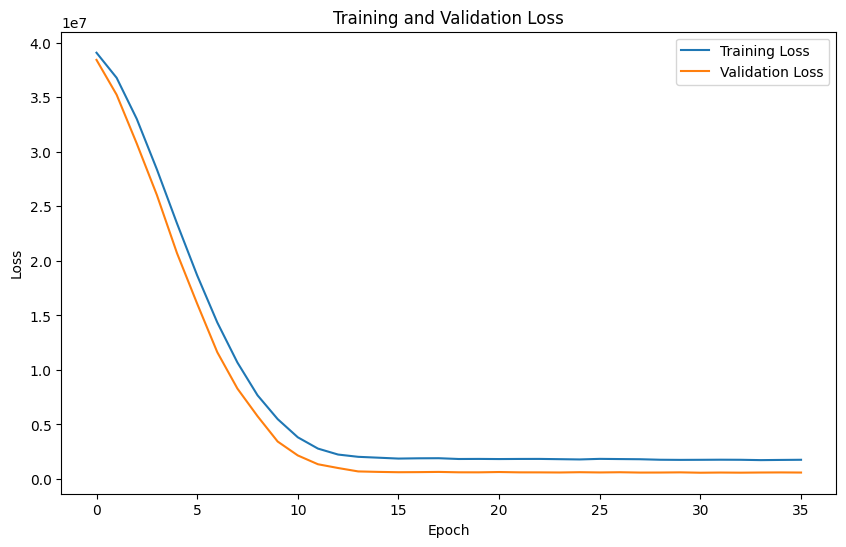

In [84]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

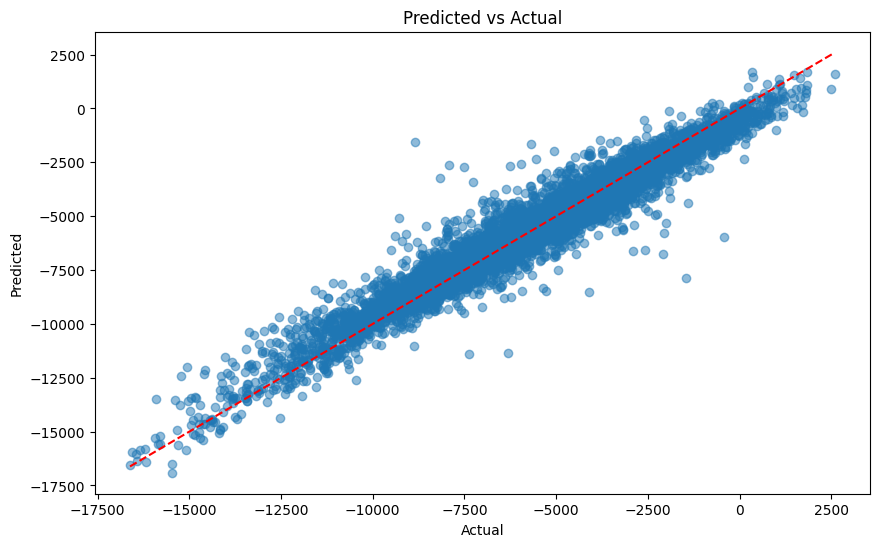

In [85]:
# Plot predicted versus actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()